In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import glob, os

data_dir= '/content/gdrive/My Drive/01 BX DSMP Case Study_2020/'
os.chdir(data_dir)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt  
import pipeline as pp

In [3]:
df = pd.read_csv("dsmp_takehome_2020.csv")

# Part 1 - Sumamry statistics and plots
## 1) Calculate the Profit Margin = (Net Profit/Gross revenue) * 100

In [4]:
df.head(12)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False
5,1,6,TX,50677036.26,9763597.30,26233794.37,365880,4452,False
6,1,7,TX,28215465.22,8245679.54,14457234.12,365880,4452,False
7,1,8,TX,38955413.84,7863853.69,19744464.29,365880,4452,False
8,1,9,TX,43602895.19,9067861.36,22138203.51,365880,4452,False
9,1,10,TX,52406102.98,9062239.73,26246199.30,365880,4452,False


In [5]:
#Calculateing the rent-adjusted annual profit margin
df['Profit Margin']=(100*(df['Gross revenue']-df['Fixed cost']-df['Variable cost']-df['Rental cost'])/df['Gross revenue']).round(2)

In [6]:
y1= df.groupby('Location number')['Profit Margin'].mean()
y2= df.groupby('Location number')['Profit Margin'].median()

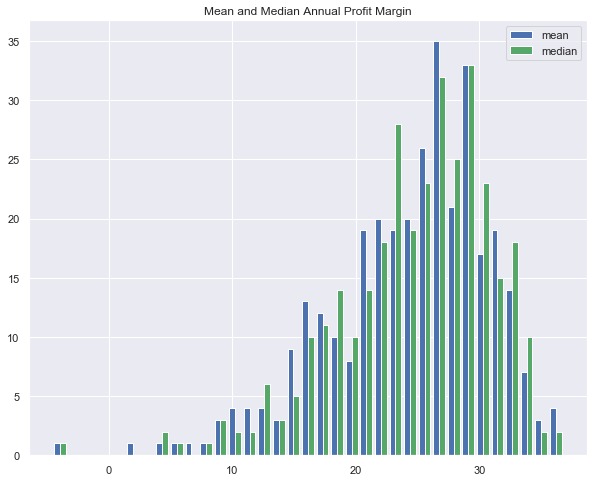

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

fig, axes = plt.subplots(figsize=(10,8))
axes.set_title('Mean and Median Annual Profit Margin')
plt.hist([y1,y2], bins=35, label=['mean', 'median'])
plt.legend(loc='upper right')
plt.show()

## Shapiro-Wilk tests if a random sample came from a normal distribution

In [8]:
from scipy import stats

In [9]:
print("The test statistic, the p-value for annual mean profit margin is :")
print(stats.shapiro(y1))

The test statistic, the p-value for annual mean profit margin is :
(0.9561271667480469, 1.994476228617259e-08)


In [10]:
print("The test statistic, the p-value for annual median profit margin is :")
print(stats.shapiro(y2))

The test statistic, the p-value for annual median profit margin is :
(0.9513421058654785, 4.859904922938085e-09)


# 2) Plot monthly and quarterly aggregate revenue across all stores

In [11]:
#Creating the column for quarter 
df['Quarter'] =(df['Month']-1)//3

In [12]:
df.Quarter.unique()

array([0, 1, 2, 3])

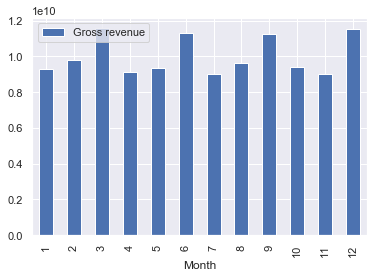

In [13]:
df.groupby('Month')[['Gross revenue']].sum().round(2).plot.bar()

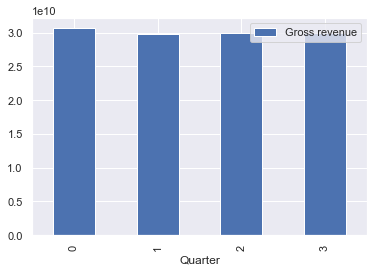

In [14]:
df.groupby('Quarter')[['Gross revenue']].sum().round(2).plot.bar()

# Part 2 -  Cleaning the data
## Impute an appropriate rental cost for each owned location and recalculate the rent-adjusted annual profit margin.  
## For each rented location, the rental cost is the same across the year. In order to simply the problem I use the median fixed cost and variable cost for the 333 locations. 

In [15]:
monthly_rent =df.groupby(['Location number'])[['Fixed cost', 'Variable cost','Rental cost']].median().round(2)

In [16]:
monthly_rent

,Fixed cost,Variable cost,Rental cost
Location number,,,
1,9065050.54,24157954.35,365880
2,6120907.30,15034245.43,65270
3,5133018.93,14942101.26,0
4,5347304.96,11552513.20,141410
5,3942744.56,8906394.02,74500
...,...,...,...
329,5489131.14,11406132.96,71970
330,5755458.78,12313428.34,224930
331,5682004.46,14620459.24,61270


In [17]:
rented =monthly_rent[monthly_rent['Rental cost']!=0]

In [18]:
owned =monthly_rent[monthly_rent['Rental cost']==0]

In [19]:
rented.shape

(297, 3)

In [20]:
owned.shape

(36, 3)

## Then for each owned location, I compare its median fixed cost and variable cost to the 297 rented location, to find the min sum of the square of two costs. And use the rented location's rental cost as the apporpriate rental cost for the owned location.

In [21]:
dct ={}
for i, row in owned.iterrows():
    print('Location ',i)
    t= (rented - row)
    t['sq'] = t['Fixed cost'].apply(lambda x: x*x)+ t['Variable cost'].apply(lambda x: x*x)
    matchid = t['sq'].idxmin()
    dct[i] = rented.loc[matchid]['Rental cost']
    print('adjusted rental price is ',rented.loc[matchid]['Rental cost'])
    print(" ")

Location  3
adjusted rental price is  297190.0
 
Location  9
adjusted rental price is  226790.0
 
Location  11
adjusted rental price is  182610.0
 
Location  21
adjusted rental price is  165110.0
 
Location  31
adjusted rental price is  195840.0
 
Location  39
adjusted rental price is  535910.0
 
Location  46
adjusted rental price is  99320.0
 
Location  48
adjusted rental price is  324570.0
 
Location  49
adjusted rental price is  94190.0
 
Location  51
adjusted rental price is  50470.0
 
Location  75
adjusted rental price is  98720.0
 
Location  81
adjusted rental price is  262770.0
 
Location  90
adjusted rental price is  215350.0
 
Location  103
adjusted rental price is  73940.0
 
Location  104
adjusted rental price is  351820.0
 
Location  107
adjusted rental price is  175630.0
 
Location  119
adjusted rental price is  279370.0
 
Location  130
adjusted rental price is  140590.0
 
Location  166
adjusted rental price is  401920.0
 
Location  171
adjusted rental price is  301200.0
 


In [22]:
dct

{3: 297190.0,
 9: 226790.0,
 11: 182610.0,
 21: 165110.0,
 31: 195840.0,
 39: 535910.0,
 46: 99320.0,
 48: 324570.0,
 49: 94190.0,
 51: 50470.0,
 75: 98720.0,
 81: 262770.0,
 90: 215350.0,
 103: 73940.0,
 104: 351820.0,
 107: 175630.0,
 119: 279370.0,
 130: 140590.0,
 166: 401920.0,
 171: 301200.0,
 177: 547010.0,
 180: 301200.0,
 188: 191440.0,
 189: 101210.0,
 194: 401920.0,
 219: 159200.0,
 222: 222960.0,
 225: 107520.0,
 251: 206220.0,
 256: 235940.0,
 281: 107350.0,
 292: 147860.0,
 300: 547010.0,
 314: 111720.0,
 316: 113600.0,
 323: 84760.0}

In [23]:
df[df.Owned==True]

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit Margin,Quarter
24,3,1,IL,30791018.69,6123108.00,17948338.14,0,4620,True,21.82,0
25,3,2,IL,23805331.16,5014361.53,13051817.38,0,4620,True,24.11,0
26,3,3,IL,33916624.99,6043273.71,19190769.99,0,4620,True,25.60,0
27,3,4,IL,24170582.83,5196755.17,13505396.58,0,4620,True,22.62,1
28,3,5,IL,24925332.00,4688566.82,14531349.44,0,4620,True,22.89,1
...,...,...,...,...,...,...,...,...,...,...,...
3871,323,8,IL,22194100.42,4586590.51,11232409.36,0,4664,True,28.72,2
3872,323,9,IL,22690822.00,5672584.18,10676641.22,0,4664,True,27.95,2
3873,323,10,IL,22318237.77,4834736.44,11101511.95,0,4664,True,28.60,3
3874,323,11,IL,19412797.72,4899314.22,9351323.91,0,4664,True,26.59,3


In [24]:
df['Adjusted Rental cost'] = df['Location number'].map(dct)

In [25]:
df['Adjusted Rental cost'].fillna(df['Rental cost'], inplace=True)

In [26]:
df.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit Margin,Quarter,Adjusted Rental cost
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,30.37,0,365880.0
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,25.02,0,365880.0
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,31.22,0,365880.0
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,27.81,1,365880.0
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,24.24,1,365880.0


In [27]:
#Recalculateing the rent-adjusted annual profit margin
df['Rent-adjusted Profit Margin']=(100*(df['Gross revenue']-df['Fixed cost']-df['Variable cost']-df['Adjusted Rental cost'])/df['Gross revenue']).round(2)

In [28]:
#Sanity check
df[df.Owned==True].head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit Margin,Quarter,Adjusted Rental cost,Rent-adjusted Profit Margin
24,3,1,IL,30791018.69,6123108.00,17948338.14,0,4620,True,21.82,0,297190.0,20.86
25,3,2,IL,23805331.16,5014361.53,13051817.38,0,4620,True,24.11,0,297190.0,22.86
26,3,3,IL,33916624.99,6043273.71,19190769.99,0,4620,True,25.60,0,297190.0,24.72
27,3,4,IL,24170582.83,5196755.17,13505396.58,0,4620,True,22.62,1,297190.0,21.39
28,3,5,IL,24925332.00,4688566.82,14531349.44,0,4620,True,22.89,1,297190.0,21.70


In [29]:
df.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit Margin,Quarter,Adjusted Rental cost,Rent-adjusted Profit Margin
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,30.37,0,365880.0,30.37
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,25.02,0,365880.0,25.02
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,31.22,0,365880.0,31.22
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,27.81,1,365880.0,27.81
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,24.24,1,365880.0,24.24


In [30]:
df.groupby('Location number')[['Profit Margin','Rent-adjusted Profit Margin']].mean().round(0)

,Profit Margin,Rent-adjusted Profit Margin
Location number,,
1,27.0,27.0
2,24.0,24.0
3,25.0,23.0
4,20.0,20.0
5,20.0,20.0
...,...,...
329,22.0,22.0
330,27.0,27.0
331,26.0,26.0


In [31]:
df.groupby('Location number')[['Profit Margin','Rent-adjusted Profit Margin']].median().round(0)

,Profit Margin,Rent-adjusted Profit Margin
Location number,,
1,28.0,28.0
2,25.0,25.0
3,25.0,24.0
4,20.0,20.0
5,22.0,22.0
...,...,...
329,23.0,23.0
330,28.0,28.0
331,26.0,26.0


In [32]:
t1 =df.groupby('Location number')['Rent-adjusted Profit Margin'].mean()
t2=df.groupby('Location number')['Profit Margin'].mean()

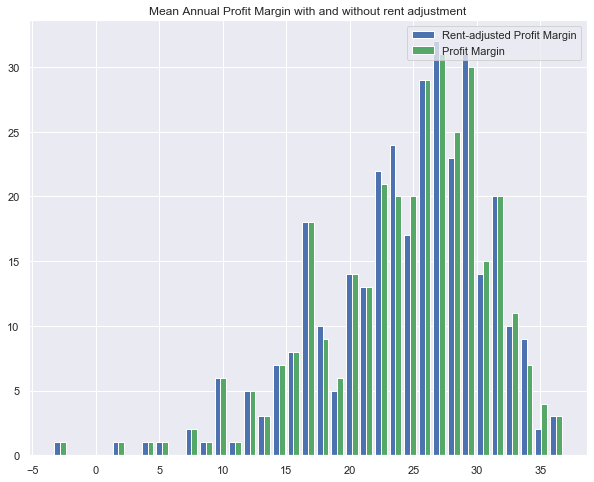

In [33]:
fig, axes = plt.subplots(figsize=(10,8))
axes.set_title('Mean Annual Profit Margin with and without rent adjustment')
plt.hist([t1,t2], bins=35, label=['Rent-adjusted Profit Margin', 'Profit Margin'])
plt.legend(loc='upper right')
plt.show()

In [34]:
z1 =df.groupby('Location number')['Rent-adjusted Profit Margin'].median()
z2=df.groupby('Location number')['Profit Margin'].median()

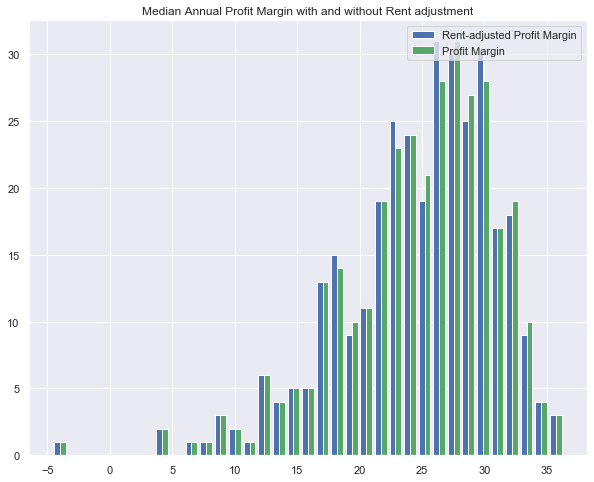

In [35]:
fig, axes = plt.subplots(figsize=(10,8))
axes.set_title('Median Annual Profit Margin with and without Rent adjustment')
plt.hist([z1,z2], bins=35, label=['Rent-adjusted Profit Margin', 'Profit Margin'])
plt.legend(loc='upper right')
plt.show()

# Part 3 -  Quantify drivers of success
##With the data now cleaned, please identify factors that have led to historical outperformance across locations. The CEO is principally focused on maximizing profit margin at each location. There is no single correct answer for this section.

In [36]:
df['Rent-adjusted Profit Margin'].describe()

count    3996.000000
mean       24.268544
std         8.372154
min       -65.260000
25%        20.355000
50%        25.520000
75%        29.660000
max        61.830000
Name: Rent-adjusted Profit Margin, dtype: float64

In [37]:
df['Number of products'].nunique()

242

In [39]:
baseline=df['Rent-adjusted Profit Margin'].median().round(2)
baseline

25.52

In [40]:
df['outperform'] = np.where(df['Rent-adjusted Profit Margin'] >= baseline, 1, 0)

I calculated a new variable called 'outperform' as my dependent variable y. I will treat it as binary classification challenge, since the ultimate goal is to identify factors that have led to historical outperformance across locations. Thus, I can create a dependent variable based on 'Rent-adjusted Profit Margin', it is 1 when 'Rent-adjusted Profit Margin'>= average Rent-adjusted Profit Margin, 0 otherwise. 

In [41]:
df['outperform'].value_counts()

1    2001
0    1995
Name: outperform, dtype: int64

In [42]:
# Finding Base Probability of Default
print ('Prob of outperform', (100*df['outperform'].sum()/df.shape[0]).round(2), '%')
print ('Prob of below median',100-(100*df['outperform'].sum()/df.shape[0]).round(2), '%')

Prob of outperform 50.08 %
Prob of below median 49.92 %


Since we are using the median Rent-adjusted Profit Margin as cut-off, the dataset is pretty balanced 

Proportion: 1.0 : 1


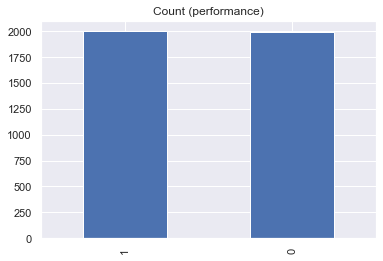

In [43]:
print('Proportion:', round(df['outperform'].value_counts()[1] / df['outperform'].value_counts()[0], 2), ': 1')
df['outperform'].value_counts().plot(kind='bar', title='Count (performance)');

In [44]:
#Save a cleaned copy
df.to_csv('cleaned_data.csv', index=False)

# Section 2: Data Cleaning

In [ ]:
#df= pd.read_csv('cleaned_data.csv')

In [45]:
#Separate the columns with numeric values and string values
SCOL = [ 'Month', 'State','Owned']

In [46]:
df[SCOL].head(10)

,Month,State,Owned
0,1,TX,False
1,2,TX,False
2,3,TX,False
3,4,TX,False
4,5,TX,False
5,6,TX,False
6,7,TX,False
7,8,TX,False
8,9,TX,False
9,10,TX,False


Month    12
State     7
Owned     2
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


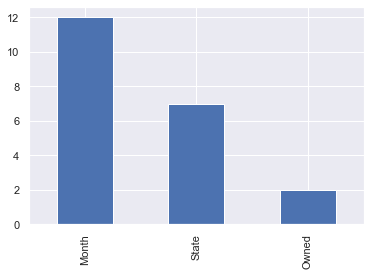

In [47]:
#Counting the unique values of the non-numeric columns
pp.counting_uniques(df[SCOL])

In [48]:
cols_to_fill = pp.Detect_missing_value(df)
cols_to_fill

[]

In [49]:
df.columns

Index(['Location number', 'Month', 'State', 'Gross revenue', 'Fixed cost',
       'Variable cost', 'Rental cost', 'Number of products', 'Owned',
       'Profit Margin', 'Quarter', 'Adjusted Rental cost',
       'Rent-adjusted Profit Margin', 'outperform'],
      dtype='object')

In [50]:
CATS = ['Number of products']

In [51]:
DROP_COLS= ['Location number','Quarter','Gross revenue', 'Fixed cost','Variable cost', 'Rental cost','Profit Margin','Adjusted Rental cost', 'Rent-adjusted Profit Margin'] 

In [52]:
#Save a clean copy for later viz purpose
viz_df = df.copy()

In [53]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', DROP_COLS)
df = df.drop(DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , SCOL)
for dummy in SCOL:
    df = pp.dummy_variable(dummy, df)
print (' ')

for category in CATS:
    df = pp.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', CATS)
print (' ')

DROPPING THESE COLUMNS:  ['Location number', 'Quarter', 'Gross revenue', 'Fixed cost', 'Variable cost', 'Rental cost', 'Profit Margin', 'Adjusted Rental cost', 'Rent-adjusted Profit Margin']
 
The following columns have been broken into dummies: ['Month', 'State', 'Owned']
 
Discretizing the following variables:  ['Number of products']
 


In [54]:
df.columns

Index(['outperform', 'Month1', 'Month2', 'Month3', 'Month4', 'Month5',
       'Month6', 'Month7', 'Month8', 'Month9', 'Month10', 'Month11', 'Month12',
       'StateCA', 'StateCO', 'StateGA', 'StateIL', 'StateNJ', 'StateTX',
       'StateWA', 'OwnedFalse', 'OwnedTrue', 'Number of products_bin1',
       'Number of products_bin2', 'Number of products_bin3',
       'Number of products_bin4'],
      dtype='object')

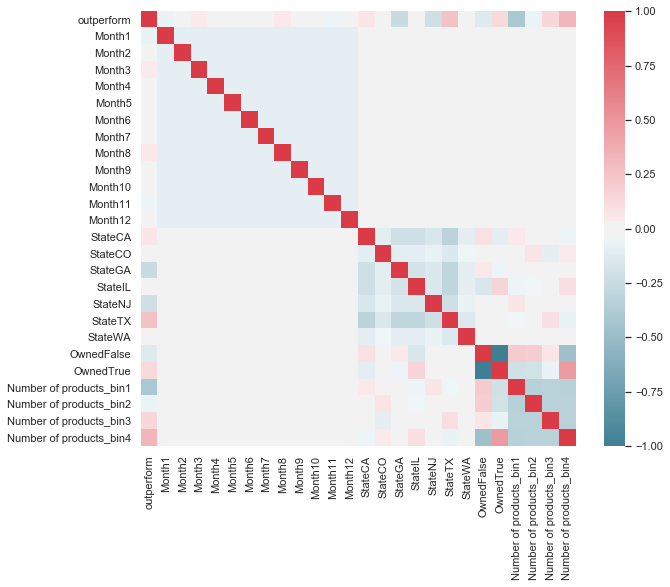

In [55]:
pp.corr_matrix(df)

# Section 3: Analysis

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time

In our case we'll be regress the outperform column using number of products, and the month, state, owned dummy variables. We're going to treat month1, stateCA, OwnedFalse, Numberofproducts_bin1 as our baseline and exclude it from our fit. This is done to prevent multicollinearity, or the dummy variable trap caused by including a dummy variable for every single category.

In [57]:
dropc =['Month1',  'StateCA',  'OwnedFalse', 'Number of products_bin1']

In [58]:
print('Dropping these columns to prevent multicollinearity: ', dropc)
df = df.drop(dropc, axis = 1)

Dropping these columns to prevent multicollinearity:  ['Month1', 'StateCA', 'OwnedFalse', 'Number of products_bin1']


In [59]:
# manually add the intercept
df['intercept'] = 1.0

In [60]:
indepv = list(df.columns)
indepv.remove('outperform')

In [61]:
x=df[indepv]
y=df['outperform']

# Since I intepret this problem as correlation problem, I didn't do the train/test split for this data.

In [104]:
model =sm.GLM(y, x, family=sm.families.Binomial())
result=model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             outperform   No. Observations:                 3996
Model:                            GLM   Df Residuals:                     3974
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1844.4
Date:                Sat, 14 Mar 2020   Deviance:                       3688.7
Time:                        18:50:50   Pearson chi2:                 3.95e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Month2                    

In [102]:
import statsmodels.api as sm
model = sm.Logit(y, x)
logit_result = model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.461553
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             outperform   No. Observations:                 3996
Model:                          Logit   Df Residuals:                     3974
Method:                           MLE   Df Model:                           21
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.3341
Time:                        18:50:07   Log-Likelihood:                -1844.4
converged:                       True   LL-Null:                       -2769.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Month2                      0.7697      0.200      3.850      0.000       0.378   

In [105]:
logit_result.pred_table()   

array([[1518.,  477.],
       [ 398., 1603.]])

In [100]:
ols_model = sm.OLS(y, x)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:             outperform   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sat, 14 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:45:55   Log-Likelihood:                -1953.1
No. Observations:                3996   AIC:                             3950.
Df Residuals:                    3974   BIC:                             4089.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Month2                    

In [66]:
viz_df['ols_pred'] = ols_results.predict(x)

In [70]:
viz_df['logit_pred'] = result.predict(x)

In [71]:
viz_df.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit Margin,Quarter,Adjusted Rental cost,Rent-adjusted Profit Margin,outperform,ols_pred,logit_pred
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,30.37,0,365880.0,30.37,1,0.531453,0.534369
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,25.02,0,365880.0,25.02,0,0.648570,0.712457
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,31.22,0,365880.0,31.22,1,0.705627,0.783835
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,27.81,1,365880.0,27.81,1,0.636558,0.695980
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,24.24,1,365880.0,24.24,0,0.702624,0.780373


In [76]:
def plot_df(df, columns, save=False):
    for col in columns:
        count_column = df[col].value_counts()
        plt.figure(figsize=(len(count_column), 5))
        column_figure = sns.barplot(count_column.index, count_column.values, alpha=0.8)
        plt.title('{} values'.format(col))
        plt.ylabel('Number of Counts', fontsize=12)
        plt.xlabel(col, fontsize=12) 

        if save: 
            column_figure.figure.savefig('{}.png'.format(col))
            print('figure is saved as a file ~.png')
        else:
            plt.show()
    return None

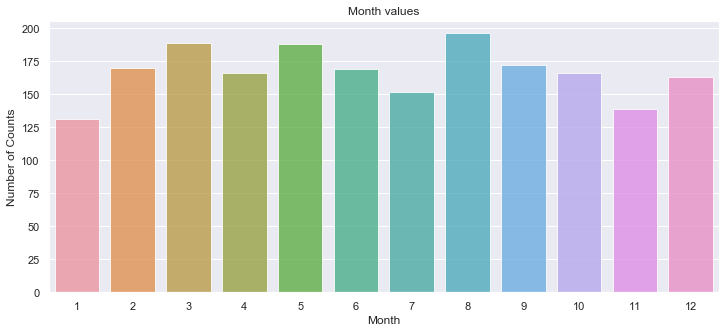

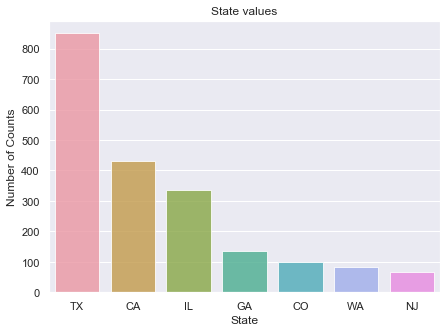

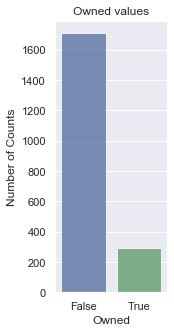

In [83]:
plot_df(viz_df[df.outperform==1], see)

In [82]:
see = [ 'Month', 'State',  'Owned']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c0a1588>]],
      dtype=object)

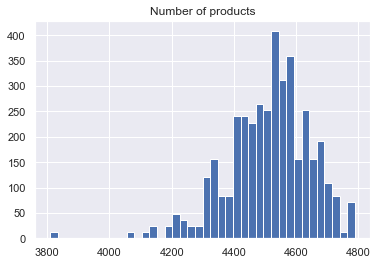

In [95]:
viz_df.hist(column='Number of products',bins=40)

In [92]:
viz_df.columns

Index(['Location number', 'Month', 'State', 'Gross revenue', 'Fixed cost',
       'Variable cost', 'Rental cost', 'Number of products', 'Owned',
       'Profit Margin', 'Quarter', 'Adjusted Rental cost',
       'Rent-adjusted Profit Margin', 'outperform', 'ols_pred', 'logit_pred'],
      dtype='object')